# Import Libraries

In [1]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

# Reading DataSet

In [2]:
path_to_train_data = "Hand Gestures dataset/train"
train_dirs = []
for entry in os.scandir(path_to_train_data):
    if entry.is_dir():
        train_dirs.append(entry.path)
        
for train_dir in train_dirs:
    print(train_dir)

Hand Gestures dataset/train\0
Hand Gestures dataset/train\1
Hand Gestures dataset/train\10
Hand Gestures dataset/train\11
Hand Gestures dataset/train\12
Hand Gestures dataset/train\13
Hand Gestures dataset/train\14
Hand Gestures dataset/train\15
Hand Gestures dataset/train\16
Hand Gestures dataset/train\17
Hand Gestures dataset/train\18
Hand Gestures dataset/train\19
Hand Gestures dataset/train\2
Hand Gestures dataset/train\3
Hand Gestures dataset/train\4
Hand Gestures dataset/train\5
Hand Gestures dataset/train\6
Hand Gestures dataset/train\7
Hand Gestures dataset/train\8
Hand Gestures dataset/train\9


In [3]:
X = []
y = []
d = range(20)
for train_dir in train_dirs:
    train = train_dir.split('\\')[-1]
    for training_image in os.scandir(train_dir):
        img1 = cv2.imread(training_image.path)
        grey = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
        X.append(grey)
        y.append(d[int(train)])

y = np.array(y)          
X = np.array(X)

# Display Hand Gestures

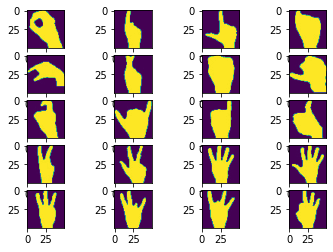

In [4]:
fig, ax = plt.subplots(5,4)
gesture = 0 
for i in range(5):
    for j in range(4):
        ax[i,j].imshow(X[gesture])
        gesture += 900
        
    

# Segmentation

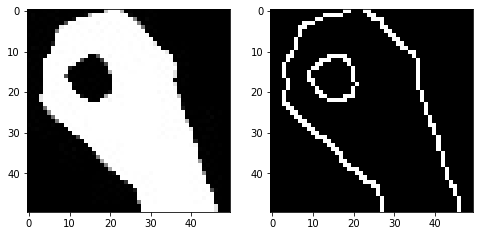

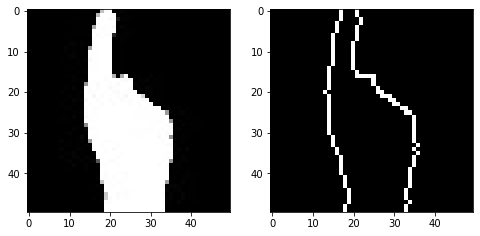

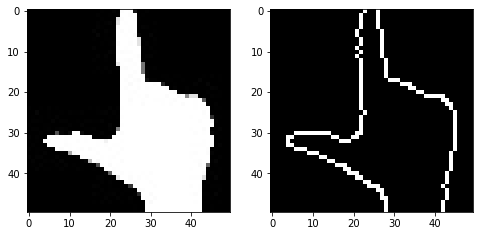

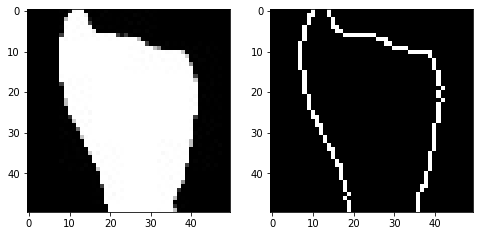

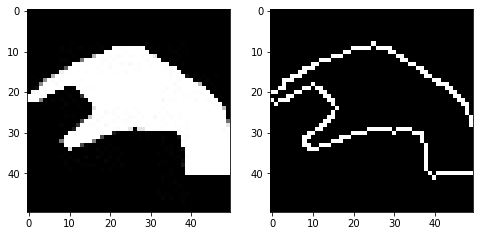

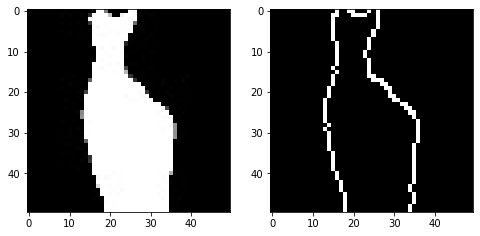

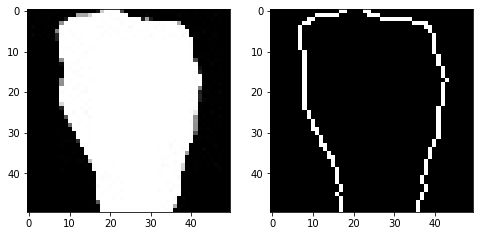

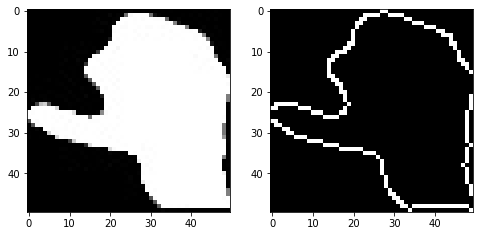

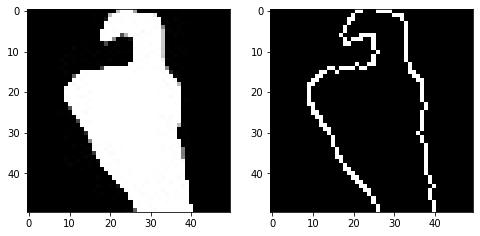

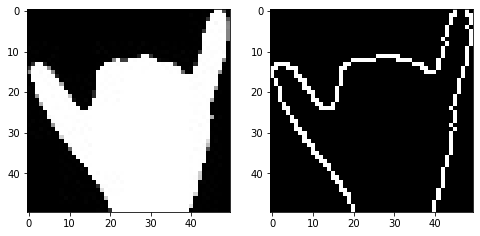

In [5]:
X_edges =[]
for img in X: 
    edges=cv2.Canny(img,100,200)
    X_edges.append(edges)
    
X_edges=np.array(X_edges)

for i in range(10):
     plt.figure(figsize=[8,5])
     plt.subplot(1, 2, 1)
     plt.imshow(X[i*900], cmap=plt.cm.gray)
     plt.subplot(1, 2, 2)
     plt.imshow(X_edges[i*900], cmap=plt.cm.gray)

# Splitting DataSet

In [6]:
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.20, random_state = 99)


(18000, 50, 50)
(18000,)


In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14400, 50, 50)
(3600, 50, 50)
(14400,)
(3600,)


# Feature Selection using PCA

In [8]:
X_train = X_train.reshape(14400,2500)
X_test = X_test.reshape(3600,2500)

In [9]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [10]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaler)
X_test_pca = pca.fit_transform(X_test_scaler)

In [11]:
X_train_pca.shape

(14400, 20)

In [12]:
X_test_pca.shape

(3600, 20)

# Classifing using Logistic Regression

In [13]:
model = LogisticRegression()
model.fit(X_train_pca,y_train)
print(model.score(X_test_pca,y_test)*100, "%")

95.30555555555556 %


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Classifing using KNN

In [14]:
KNN = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
KNN.fit(X_train_pca,y_train)
y_pred=KNN.predict(X_test_pca)
print(accuracy_score(y_pred,y_test)*100, "%")

99.30555555555556 %
